We have taken historical Russian Ruble (RUB) to US Dollar (USD) exchange rate data. We have taken the monthly averages for each month since 2019. The intent behind taking the monthly average is to smooth out the data and not deal with problems such as holidays and non-trading days. The data is taken from Wall Street Journal.

In [30]:
import pandas as pd
import statsmodels.api as sm
rubusd = pd.read_csv('HistoricalPricesRUBUSD.csv', index_col='Date', parse_dates=True, date_format='%m/%d/%y', usecols=['Date', 'Close'])
rubusd.groupby(pd.PeriodIndex(rubusd.index, freq="M"))['Close'].mean()
rubusd.sort_index(inplace=True)
rubusd_MoM_change = rubusd.pct_change()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

<Axes: title={'center': 'RUB/USD MoM Change'}, xlabel='Date'>

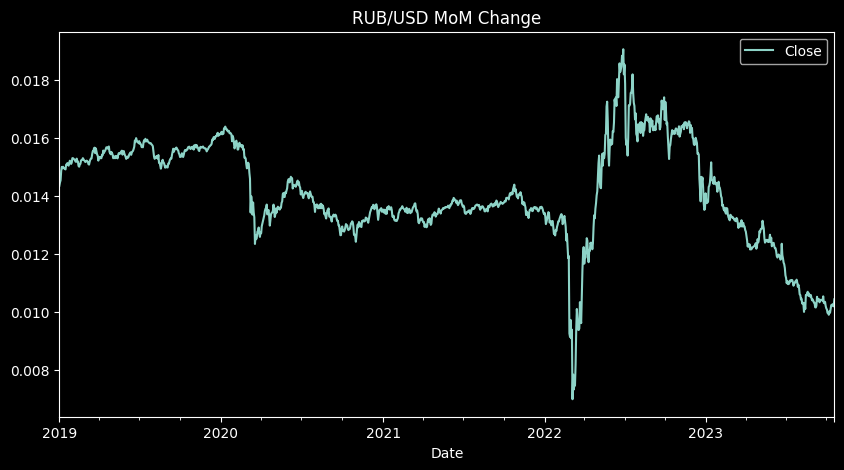

In [20]:
rubusd.plot(figsize=(10, 5), title='RUB/USD MoM Change')

In [81]:
rubusd_model = sm.tsa.MarkovRegression(endog=rubusd, trend='c',k_regimes=2) 
rubusd_model_results = rubusd_model.fit(iter=1000)
rubusd_model_results.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1253
Model:               MarkovRegression   Log Likelihood                6555.722
Date:                Sat, 21 Oct 2023   AIC                         -13101.444
Time:                        12:55:14   BIC                         -13075.777
Sample:                    01-01-2019   HQIC                        -13091.796
                         - 10-19-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.000    103.611      0.000       0.011       0.011
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146   4.05e-05    359.630      0.000       0.014       0.015
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.632e-06   6.95e-08     23.480      0.000     1.5e-06    1.77e-06
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9934      0.006    176.560      0.000       0.982       1.004
p[1->0]        0.0017      0.001      1.385      0.166      -0.001       0.004
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [84]:
print(rubusd_model_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &      Close       & \textbf{  No. Observations:  } &    1253     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  6555.722   \\
\textbf{Date:}            & Sat, 21 Oct 2023 & \textbf{  AIC                } & -13101.444  \\
\textbf{Time:}            &     12:57:24     & \textbf{  BIC                } & -13075.777  \\
\textbf{Sample:}          &    01-01-2019    & \textbf{  HQIC               } & -13091.796  \\
\textbf{}                 &   - 10-19-2023   & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} &       0.0112  &        0.000     &   103.611  &         0.000        &        0.011    

We classify the Ruble to US Dollar exchange rate into high exchange rate and low exchange rate regimes.
$$
\boldsymbol{P}=\left[\begin{array}{ll}
p_{ll} & p_{lh} \\
p_{hl} & p_{hh}
\end{array}\right]$$

$$
\boldsymbol{P}=\left[\begin{array}{ll}
0.9934 & 0.0066 \\
0.0017 & 0.9983 
\end{array}\right]$$

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

<Axes: title={'center': 'Probability of being in the low regime'}, xlabel='Date'>

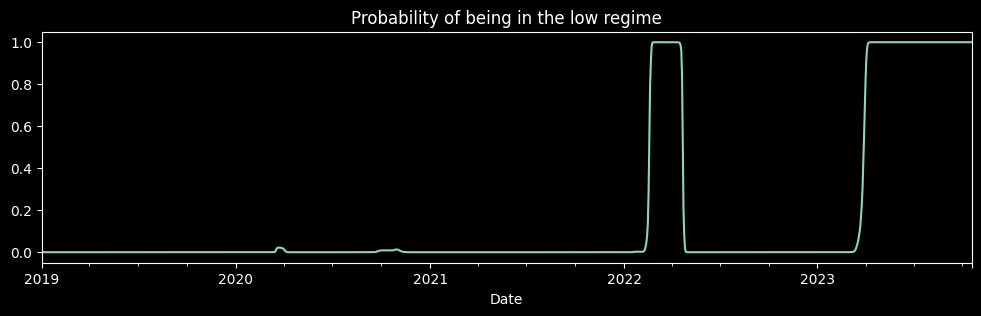

In [42]:

rubusd_model_results.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1495: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future

<Axes: title={'center': 'Probability of being in the high regime'}, xlabel='Date'>

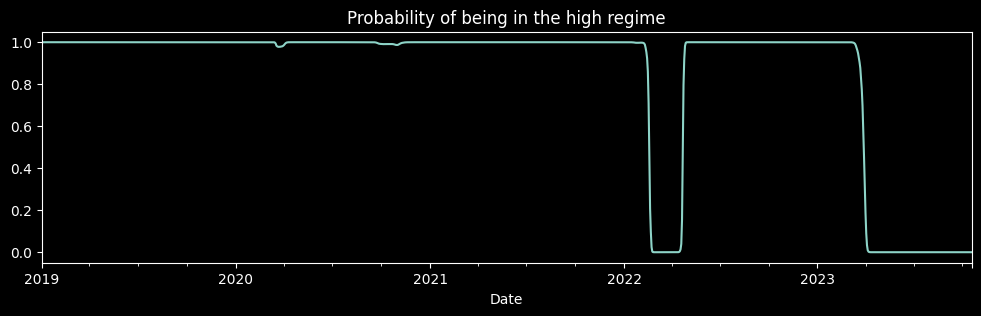

In [38]:

rubusd_model_results.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

In [51]:
rubusd_model_no_intercept = sm.tsa.MarkovRegression(endog=rubusd, trend='c',k_regimes=2, switching_trend=True) 
rubusd_model__no_intercept_results = rubusd_model.fit(iter=1000)
rubusd_model__no_intercept_results.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1253
Model:               MarkovRegression   Log Likelihood                3556.765
Date:                Sat, 21 Oct 2023   AIC                          -7107.529
Time:                        12:26:41   BIC                          -7092.129
Sample:                    01-01-2019   HQIC                         -7101.741
                         - 10-19-2023                                         
Covariance Type:               approx                                         
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   8.01e-06     25.030      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5000         -0       -inf      0.000       0.500       0.500
p[1->0]        0.5000         -0       -inf      0.000       0.500       0.500
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [91]:
rubusd_model_switching_trend = sm.tsa.MarkovRegression(endog=rubusd, trend='n',k_regimes=2, switching_trend=True) 
rubusd_model_switching_trend_results = rubusd_model_switching_trend.fit(iter=1000)
rubusd_model_switching_trend_results.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1253
Model:               MarkovRegression   Log Likelihood                3556.765
Date:                Sat, 21 Oct 2023   AIC                          -7107.529
Time:                        13:12:06   BIC                          -7092.129
Sample:                    01-01-2019   HQIC                         -7101.741
                         - 10-19-2023                                         
Covariance Type:               approx                                         
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   8.01e-06     25.030      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5000         -0       -inf      0.000       0.500       0.500
p[1->0]        0.5000         -0       -inf      0.000       0.500       0.500
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [92]:
print(rubusd_model_switching_trend_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &      Close       & \textbf{  No. Observations:  } &    1253     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  3556.765   \\
\textbf{Date:}            & Sat, 21 Oct 2023 & \textbf{  AIC                } & -7107.529   \\
\textbf{Time:}            &     13:12:15     & \textbf{  BIC                } & -7092.129   \\
\textbf{Sample:}          &    01-01-2019    & \textbf{  HQIC               } & -7101.741   \\
\textbf{}                 &   - 10-19-2023   & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     8.01e-06     &    25.030  &         0.000        &        0.000  

In [79]:
rubusd_model_switching_variance = sm.tsa.MarkovRegression(endog=rubusd, trend='n',k_regimes=2, switching_variance=True) 
rubusd_model_switching_variance_results = rubusd_model_switching_variance.fit(iter=1000)
rubusd_model_switching_variance_results.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1253
Model:               MarkovRegression   Log Likelihood                3556.765
Date:                Sat, 21 Oct 2023   AIC                          -7105.529
Time:                        12:32:30   BIC                          -7084.996
Sample:                    01-01-2019   HQIC                         -7097.811
                         - 10-19-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.29e-11   1.55e+07      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   8.01e-06     25.030      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     9.979e-21     51.300   1.95e-22      1.000    -100.547     100.547
p[1->0]     9.978e-21   8.84e-09   1.13e-12      1.000   -1.73e-08    1.73e-08
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [87]:
print(rubusd_model_switching_variance_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &      Close       & \textbf{  No. Observations:  } &    1253     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  3556.765   \\
\textbf{Date:}            & Sat, 21 Oct 2023 & \textbf{  AIC                } & -7105.529   \\
\textbf{Time:}            &     13:10:14     & \textbf{  BIC                } & -7084.996   \\
\textbf{Sample:}          &    01-01-2019    & \textbf{  HQIC               } & -7097.811   \\
\textbf{}                 &   - 10-19-2023   & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     1.29e-11     &  1.55e+07  &         0.000        &        0.000  

In [78]:
rubusd_model_switching_variance_and_trend = sm.tsa.MarkovRegression(endog=rubusd, trend='n',k_regimes=2, switching_variance=True, switching_trend=True) 
rubusd_model_switching_variance_and_trend_results = rubusd_model_switching_variance_and_trend.fit(iter=1000)
rubusd_model_switching_variance_and_trend_results.summary()

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1253
Model:               MarkovRegression   Log Likelihood                3556.765
Date:                Sat, 21 Oct 2023   AIC                          -7105.529
Time:                        12:31:47   BIC                          -7084.996
Sample:                    01-01-2019   HQIC                         -7097.811
                         - 10-19-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.29e-11   1.55e+07      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   8.01e-06     25.030      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     9.979e-21     51.300   1.95e-22      1.000    -100.547     100.547
p[1->0]     9.978e-21   8.84e-09   1.13e-12      1.000   -1.73e-08    1.73e-08
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [93]:
print(rubusd_model_switching_trend_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &      Close       & \textbf{  No. Observations:  } &    1253     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  3556.765   \\
\textbf{Date:}            & Sat, 21 Oct 2023 & \textbf{  AIC                } & -7107.529   \\
\textbf{Time:}            &     13:15:05     & \textbf{  BIC                } & -7092.129   \\
\textbf{Sample:}          &    01-01-2019    & \textbf{  HQIC               } & -7101.741   \\
\textbf{}                 &   - 10-19-2023   & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     8.01e-06     &    25.030  &         0.000        &        0.000  